<a href="https://colab.research.google.com/github/PranayUmredkar97/Reunion-Data-Science-Assignemt/blob/main/Task_2_ML_model_to_predict_credit_risk(high_or_low).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Background**

A person’s creditworthiness is often associated (conversely) with the likelihood they may default on loans.

We’re giving you anonymized data on about 1000 loan applications, along with a certain set of attributes about the applicant itself, and whether they were considered high risk.

0 = Low credit risk i.e high chance of paying back the loan amount

1 = High credit risk i.e low chance of paying back the loan amount

### **TASK-2**

**Develop the ML model(s) to predict the credit risk(low or high) for a given applicant.** 

**Business Constraint:** Note that it is worse to state an applicant as a low credit risk when they are actually a high risk, than it is to state an applicant to be a high credit risk when they aren’t.

**Provide the answers for the below points:**

1. Explain your intuition behind the features used for modeling.
2. Are you creating new derived features? If yes explain the intuition behind them.
3. Are there missing values? If yes how you plan to handle it.
4. How categorical features are handled for modeling.
5. Describe the features correlation using correlation matrix. Tell us about few correlated feature & share your understanding on why they are correlated.
6. Do you plan to drop the correlated feature? If yes then how.
7. Which ML algorithm you plan to use for modeling.
8. **Train two (at least) ML models** to predict the credit risk & provide the confusion matrix for each model.
9. How you will select the hyperparameters for models trained in above step.
10. Which metric(s) you will choose to select between the set of models.
11. Explain how you will export the trained models & deploy it for prediction in production.

- **Dataset Description**
    
    The dataset has two files:
    
    1. `applicant.csv`: This file contains personal data about the (primary) applicant
    - Unique ID: `applicant_id` (string)
    - Other fields:
        - Primary_applicant_age_in_years (numeric)
        - Gender (string)
        - Marital_status (string)
        - Number_of_dependents (numeric)
        - Housing (string)
        - Years_at_current_residence (numeric)
        - Employment_status (string)
        - Has_been_employed_for_at_least (string)
        - Has_been_employed_for_at_most (string)
        - Telephone (string)
        - Foreign_worker (numeric)
        - Savings_account_balance (string)
        - Balance_in_existing_bank_account_(lower_limit_of_bucket) (string)
        - Balance_in_existing_bank_account_(upper_limit_of_bucket) (string)
    
    2. `loan.csv`: This file contains data more specific to the loan application
    - Target: `high_risk_application` (numeric)
    - Other fields:
        - applicant_id (string)
        - Months_loan_taken_for (numeric)
        - Purpose (string)
        - Principal_loan_amount (numeric)
        - EMI_rate_in_percentage_of_disposable_income (numeric)
        - Property (string)
        - Has_coapplicant (numeric)
        - Has_guarantor (numeric)
        - Other_EMI_plans (string)
        - Number_of_existing_loans_at_this_bank (numeric)
        - Loan_history (string)

In [26]:
#importing required libraries
import numpy as np #for numerical computation
import pandas as pd #for data manipulation
import matplotlib.pyplot as plt #for visualization
%matplotlib inline
import seaborn as sns #for visualzaton
import warnings #to supress warnings
warnings.filterwarnings('ignore')

In [27]:
#set max columns display limit
pd.set_option("display.max_columns", 100)
#to supress scientific notation
pd.set_option('display.float_format', '{:.3f}'.format)
#set style for graph
sns.set_style(style='darkgrid')

# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

I am using cleaned dataframe as we did some preprocessing in our EDA process.

In [28]:
#reading dataset 

#file location
cleaned_df= 'df.csv'
# df = pd.read_csv('df.csv')
df =pd.read_csv(cleaned_df)


In [29]:
df.head()

,Unnamed: 0,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,0,67,male,single,1,own,4,skilled employee / official,7 years,7 years,1,Low,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0
1,1,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,1,Low,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1
2,2,49,male,single,2,own,3,unskilled - resident,4 years,7 years,1,Low,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0
3,3,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,1,Low,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0
4,4,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,1,Low,24,new vehicle,4870000,3,car or other,0,0,2,delay in paying off loans in the past,1


We have 22 columns in our dataset and one extra column is created for index (unnamed), we will drop that column.

In [30]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [31]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Primary_applicant_age_in_years               1000 non-null   int64 
 1   Gender                                       1000 non-null   object
 2   Marital_status                               1000 non-null   object
 3   Number_of_dependents                         1000 non-null   int64 
 4   Housing                                      1000 non-null   object
 5   Years_at_current_residence                   1000 non-null   int64 
 6   Employment_status                            1000 non-null   object
 7   Has_been_employed_for_at_least               1000 non-null   object
 8   Has_been_employed_for_at_most                1000 non-null   object
 9   Foreign_worker                               1000 non-null   int64 
 10  Savings_accou

In [32]:
#checking descriptive statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Primary_applicant_age_in_years,1000.000,35.546,11.375,19.000,27.000,33.000,42.000,75.000
Number_of_dependents,1000.000,1.155,0.362,1.000,1.000,1.000,1.000,2.000
Years_at_current_residence,1000.000,2.845,1.104,1.000,2.000,3.000,4.000,4.000
Foreign_worker,1000.000,0.963,0.189,0.000,1.000,1.000,1.000,1.000
Months_loan_taken_for,1000.000,20.903,12.059,4.000,12.000,18.000,24.000,72.000
Principal_loan_amount,1000.000,3271258.000,2822736.876,250000.000,1365500.000,2319500.000,3972250.000,18424000.000
EMI_rate_in_percentage_of_disposable_income,1000.000,2.973,1.119,1.000,2.000,3.000,4.000,4.000
Has_coapplicant,1000.000,0.041,0.198,0.000,0.000,0.000,0.000,1.000
Has_guarantor,1000.000,0.052,0.222,0.000,0.000,0.000,0.000,1.000
Number_of_existing_loans_at_this_bank,1000.000,1.407,0.578,1.000,1.000,1.000,2.000,4.000


## **Corrlation heatmap**

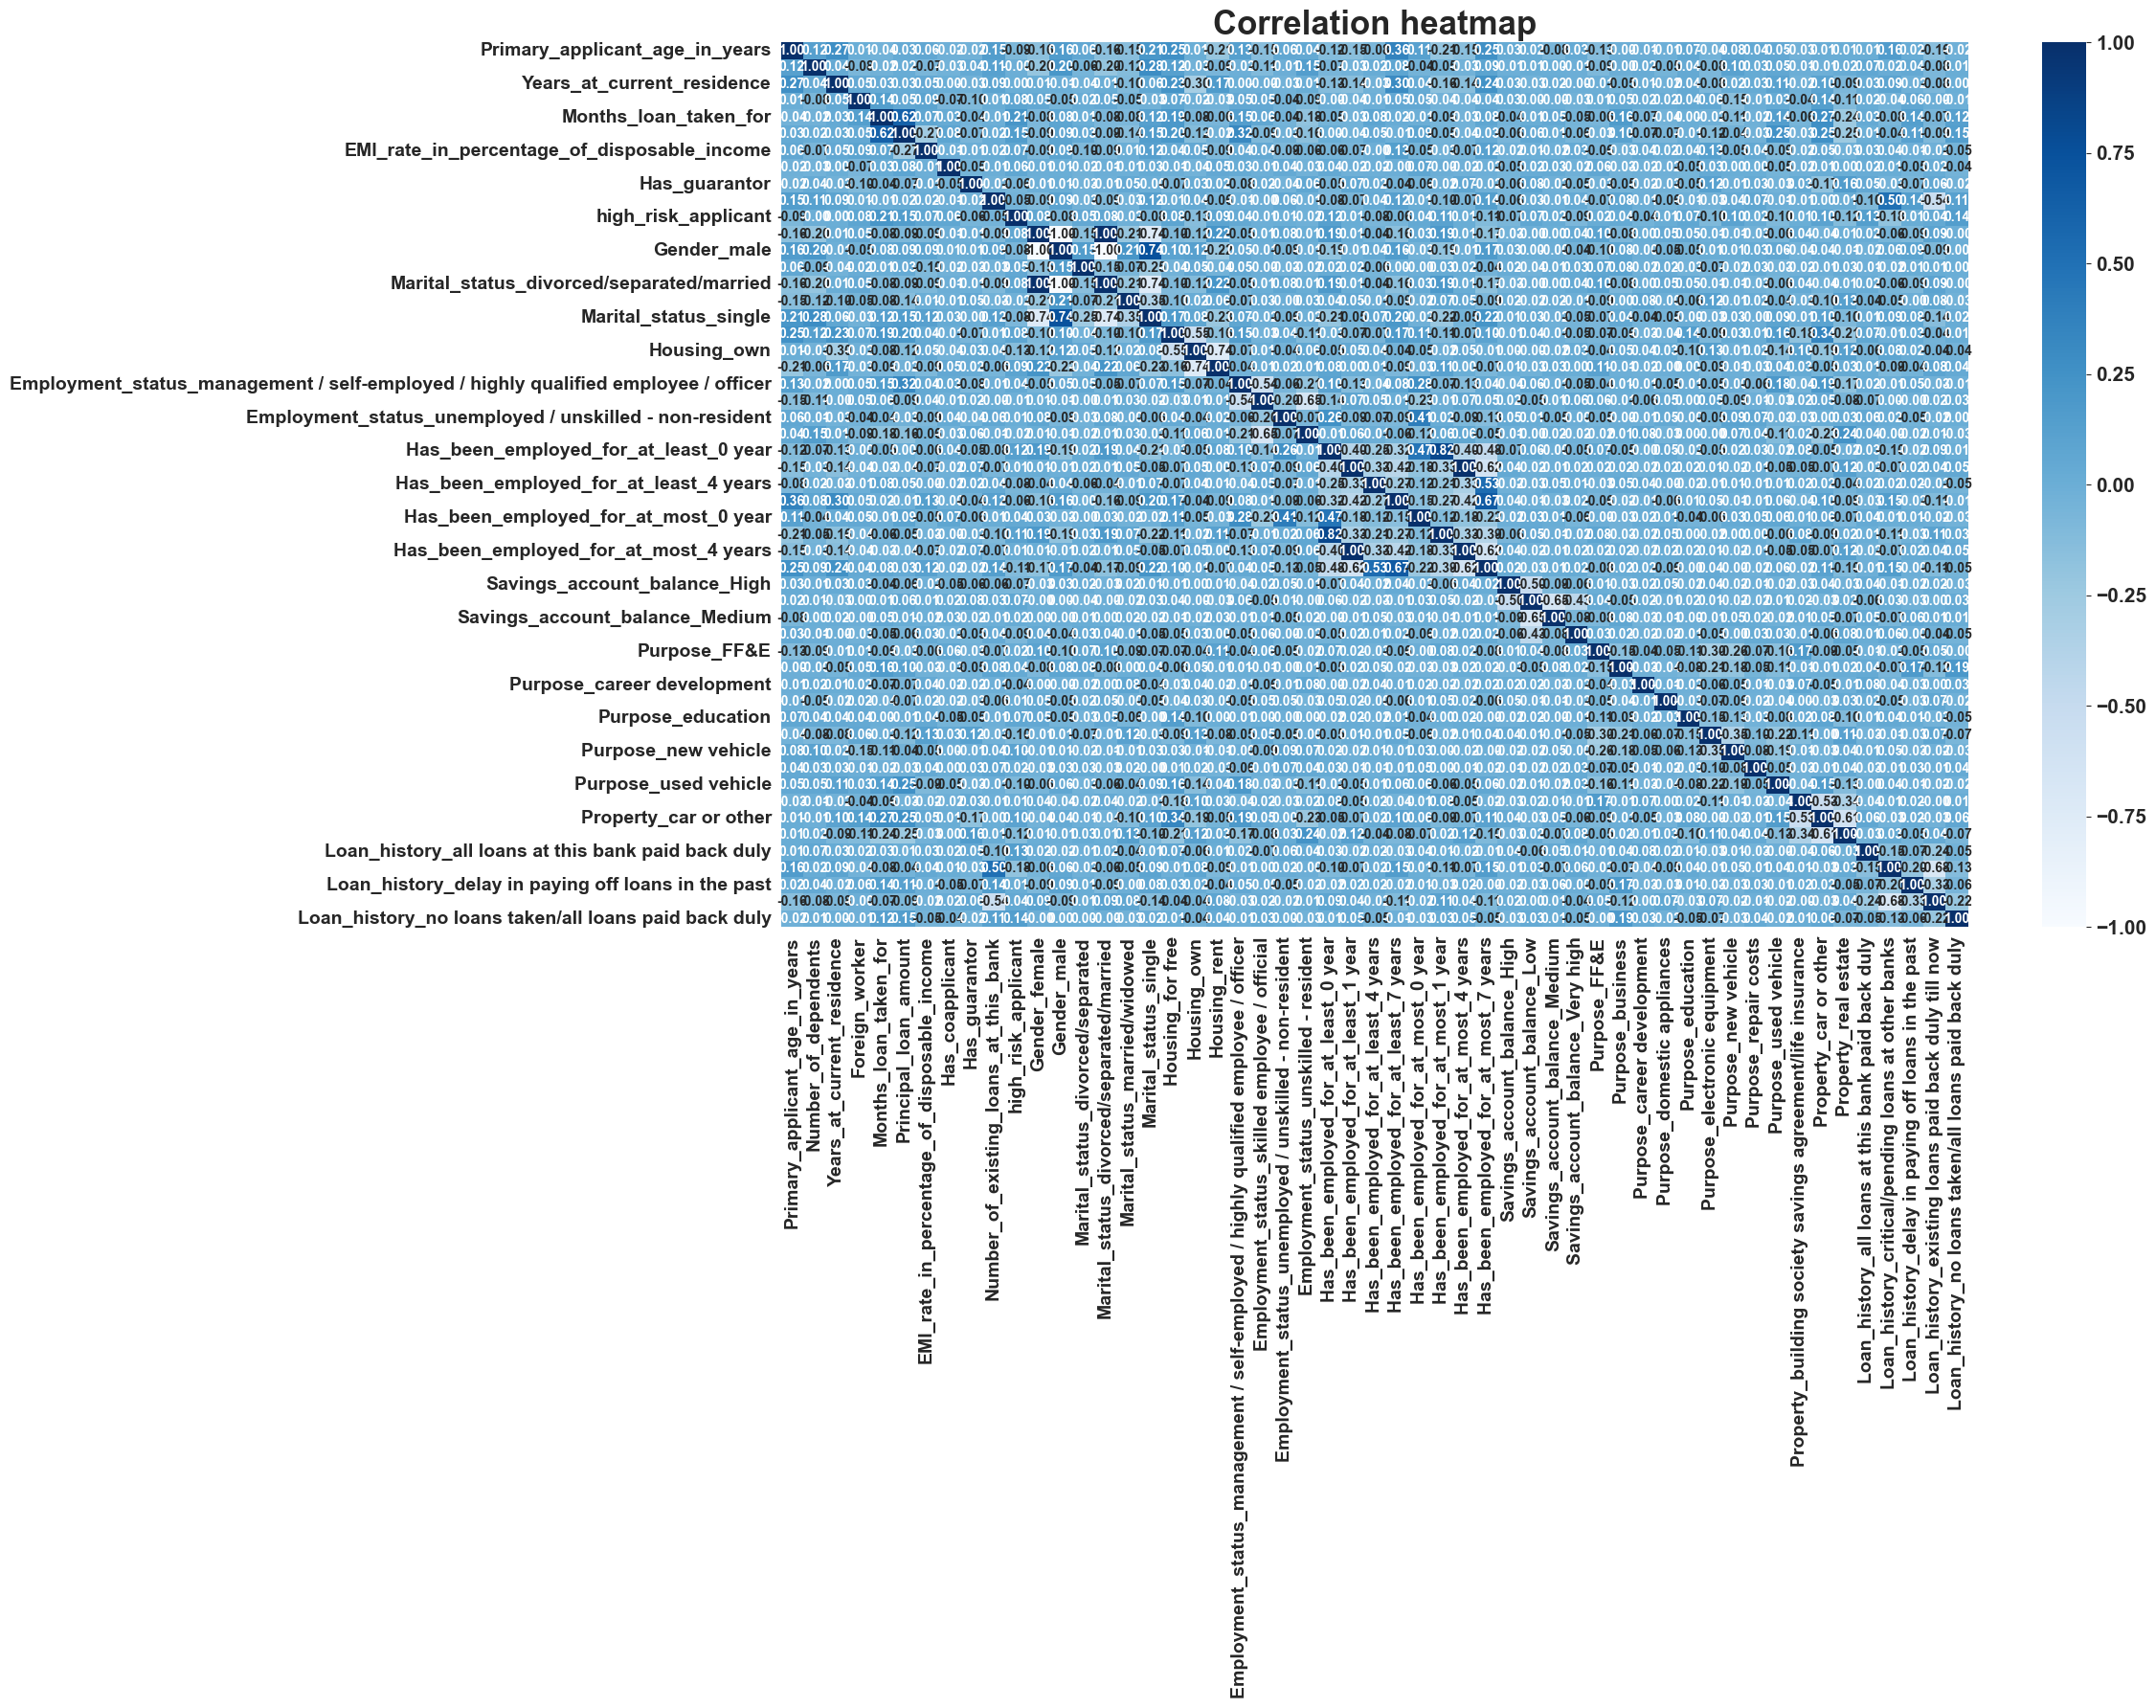

In [33]:
# Encoding categorical variables
encoded_df = pd.get_dummies(df)

# Plotting correlation heatmap
plt.figure(figsize=(20,12))
sns.heatmap(encoded_df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Correlation heatmap');

* high_risk_applicant has high positive corrleation with months_loan_taken_for, principal_loan_amount. It's obvious that risk of making a default is depends on how much month loan has taken for how much loan is taken. 
* Years_at_current_residance and primary_applicant_age_in_years have high corrleation with each other. If someone is staying at current residence it mean they are also aging.
* As we can principal loan amount and for month loan is taken for has higher correlation which is obvious if someone taking high loan amount it will also required more months to repay it, we are dropping them.

## **Feature Engineering**

* We will first bin the age, number of month loan taken  column into some part categories. 
* Then we will convert categorical features into numerical feature using get dummies technique.
* Then We wil use some scaling techniques to transform all the features on similar scale.
* Handling missing values and dropping features we had already done that in EDA.


In [34]:
#check unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object'])
for col in categorical_columns:
  print(f'Unique values in categorical columns {col} are: {categorical_columns[col].unique()} and number of categories are {len(categorical_columns[col].unique())} \n')

Unique values in categorical columns Gender are: ['male' 'female'] and number of categories are 2 

Unique values in categorical columns Marital_status are: ['single' 'divorced/separated/married' 'divorced/separated'
 'married/widowed'] and number of categories are 4 

Unique values in categorical columns Housing are: ['own' 'for free' 'rent'] and number of categories are 3 

Unique values in categorical columns Employment_status are: ['skilled employee / official' 'unskilled - resident'
 'management / self-employed / highly qualified employee / officer'
 'unemployed / unskilled - non-resident'] and number of categories are 4 

Unique values in categorical columns Has_been_employed_for_at_least are: ['7 years' '1 year' '4 years' '0 year'] and number of categories are 4 

Unique values in categorical columns Has_been_employed_for_at_most are: ['7 years' '4 years' '0 year' '1 year'] and number of categories are 4 

Unique values in categorical columns Savings_account_balance are: ['Low' 

In [35]:
#check unique values in numerical columns
numerical_columns = df._get_numeric_data()
for col in numerical_columns:
  print(f'Unique values in numerical columns {col} are: {numerical_columns[col].unique()[:15]}\n')

Unique values in numerical columns Primary_applicant_age_in_years are: [67 22 49 45 53 35 61 28 25 24 60 32 44 31 48]

Unique values in numerical columns Number_of_dependents are: [1 2]

Unique values in numerical columns Years_at_current_residence are: [4 2 3 1]

Unique values in numerical columns Foreign_worker are: [1 0]

Unique values in numerical columns Months_loan_taken_for are: [ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11]

Unique values in numerical columns Principal_loan_amount are: [1169000 5951000 2096000 7882000 4870000 9055000 2835000 6948000 3059000
 5234000 1295000 4308000 1567000 1199000 1403000]

Unique values in numerical columns EMI_rate_in_percentage_of_disposable_income are: [4 2 3 1]

Unique values in numerical columns Has_coapplicant are: [0 1]

Unique values in numerical columns Has_guarantor are: [0 1]

Unique values in numerical columns Number_of_existing_loans_at_this_bank are: [2 1 3 4]

Unique values in numerical columns high_risk_applicant are: [0 1]



* from above we can see that for Primary_applicant_age_in_years, Months_loan_taken_for have values in higher dimension so we will binned them in some less categories to reduce number of features as they can be treated as an category.

In [36]:
#Creating bins of age to distribute age range in three categories
# As age rnages from 19 to 75 we will divide t into three categories youth, middle age and senior citizen
df['applicant_age'] = np.nan
df.loc[df.Primary_applicant_age_in_years<=30,'applicant_age'] = 'youth'
df.loc[(df.Primary_applicant_age_in_years > 31) & (df.Primary_applicant_age_in_years < 60), 'applicant_age'] = 'middle_age'
df.loc[(df.Primary_applicant_age_in_years >=60 ), 'applicant_age'] = 'senior_citizen'


In [37]:
#Creating bins of Months_loan_taken_for to distribute range in three categories
# As Months_loan_taken_for ranges from 4 to 72, we will divide it into three catgories, 1-12 months, 12-24 months and greather than 24month 
df['loan_duration'] = np.nan
df.loc[df.Months_loan_taken_for<=12,'loan_duration'] = '1_12_month'
df.loc[(df.Months_loan_taken_for > 12) & (df.Months_loan_taken_for < 25), 'loan_duration'] = '12_24_month'
df.loc[(df.Months_loan_taken_for >24 ), 'loan_duration'] = 'greater_than_24_month'


Now we had created categories from age and month loan taken for we can drop this column.

In [38]:
#selectig columns to do one hot encoding
col_for_one_hot_encoding = ['Gender','Marital_status','Housing','Employment_status','Has_been_employed_for_at_least','Has_been_employed_for_at_most',
 'Savings_account_balance','Purpose','Property','Loan_history','Number_of_dependents','Years_at_current_residence',
 'EMI_rate_in_percentage_of_disposable_income','Number_of_existing_loans_at_this_bank','applicant_age','loan_duration']

In [39]:
#one hot encoding using get dummies and setting drop first true to avoid dummy variable trap
df = pd.get_dummies(df,columns=col_for_one_hot_encoding, drop_first=True)

In [40]:
df.head()

,Primary_applicant_age_in_years,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,Has_coapplicant,Has_guarantor,high_risk_applicant,Gender_male,Marital_status_divorced/separated/married,Marital_status_married/widowed,Marital_status_single,Housing_own,Housing_rent,Employment_status_skilled employee / official,Employment_status_unemployed / unskilled - non-resident,Employment_status_unskilled - resident,Has_been_employed_for_at_least_1 year,Has_been_employed_for_at_least_4 years,Has_been_employed_for_at_least_7 years,Has_been_employed_for_at_most_1 year,Has_been_employed_for_at_most_4 years,Has_been_employed_for_at_most_7 years,Savings_account_balance_Low,Savings_account_balance_Medium,Savings_account_balance_Very high,Purpose_business,Purpose_career development,Purpose_domestic appliances,Purpose_education,Purpose_electronic equipment,Purpose_new vehicle,Purpose_repair costs,Purpose_used vehicle,Property_car or other,Property_real estate,Loan_history_critical/pending loans at other banks,Loan_history_delay in paying off loans in the past,Loan_history_existing loans paid back duly till now,Loan_history_no loans taken/all loans paid back duly,Number_of_dependents_2,Years_at_current_residence_2,Years_at_current_residence_3,Years_at_current_residence_4,EMI_rate_in_percentage_of_disposable_income_2,EMI_rate_in_percentage_of_disposable_income_3,EMI_rate_in_percentage_of_disposable_income_4,Number_of_existing_loans_at_this_bank_2,Number_of_existing_loans_at_this_bank_3,Number_of_existing_loans_at_this_bank_4,applicant_age_senior_citizen,applicant_age_youth,loan_duration_1_12_month,loan_duration_greater_than_24_month
0,67,1,6,1169000,0,0,0,True,False,False,True,True,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True,True,False,False,True,False,True,False
1,22,1,48,5951000,0,0,1,False,True,False,False,True,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True
2,49,1,12,2096000,0,0,0,True,False,False,True,True,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,False
3,45,1,42,7882000,0,1,0,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False,False,False,False,False,True
4,53,1,24,4870000,0,0,1,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,True,False,False,False,False,False,False


Now we have transformed categorical features into numerical features now let's drop some redunddant columns like age and months loan taken for.

In [41]:
df.drop(columns = ['Primary_applicant_age_in_years','Months_loan_taken_for'], inplace=True)

# **Model Training and Testing**

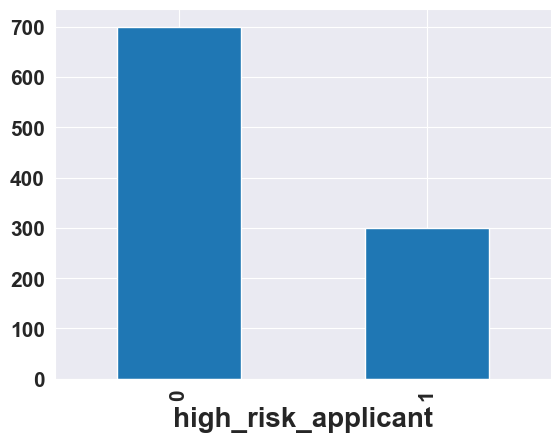

In [42]:
#checking Target variable distribution

df['high_risk_applicant'].value_counts().plot(kind='bar');

We can see there is a class imbalance in our dataset 

In [43]:
#importing all the required ML packages
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler #for feature scaling
import xgboost as xgb
#importing roc curve and roc auc score
from sklearn.metrics import roc_curve,roc_auc_score
#importing library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [44]:
#removing target variable from data frame to seperate feature and target
features = df.drop('high_risk_applicant',axis=1)

In [45]:
features.shape

(1000, 50)

In [46]:
#target variable
target = df['high_risk_applicant']

In [47]:
target.shape

(1000,)

In [48]:
#splitting data into train test split
X_train, X_test, y_train, y_test = train_test_split(features,target , test_size = 0.3, random_state = 42, stratify =target) 

## **Random Over-Sampling**
* Oversampling can be defined as adding more copies to the minority class.
* Oversampling can be a good choice when you don’t have a ton of data to work with.

In [49]:
df['high_risk_applicant'].value_counts()

high_risk_applicant
0    700
1    300
Name: count, dtype: int64

In [50]:
#importing library required for resampling
from imblearn.over_sampling import RandomOverSampler,SVMSMOTE
Random = RandomOverSampler()
# Random = SVMSMOTE()
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# fit predictor and target variable
x_trainr, y_trainr = Random.fit_resample(X_train,y_train)


print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_trainr),len(y_trainr)) 

Original dataset shape 700
Resampled dataset shape 980 980


## **Feature Scaling**
Feature Scaling is a technique to normalize/standardize the independent features present in the dataset in a fixed range.

In [51]:
#importing library required for scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
x_trainr = scaler.fit_transform(x_trainr)
X_test = scaler.transform(X_test)

# **Logistic Regression** 

In [52]:
#training logistic regression model
LR = LogisticRegression()
LR.fit(x_trainr,y_trainr)

LogisticRegression()

In [53]:
#checking shape of train and test data
print(x_trainr.shape)
print(X_test.shape)

(980, 50)
(300, 50)


In [54]:
y_pred = LR.predict(X_test)
y_pred_train = LR.predict(x_trainr)

In [55]:
# create a function to print metrics of a model
def model_metrics(model,X_train,y_train,y_test,y_pred,y_pred_train):
  '''This function takes six arguments and print model metrics like
     model
     Train score
     Test score
     Classification Report(train and test)
     Confussion Matrix

  '''
  #check model performance and metrics
  print(f'Train Score :{model.score(X_train,y_train)}')
  print(f'Test score :{accuracy_score(y_test,y_pred)}')
  print(f'precision_score: {precision_score(y_test,y_pred)}')
  print(f'recall_score: {recall_score(y_test,y_pred)}')
  #to print one blank line
  print('Classification report for Training')
  print(classification_report(y_train,y_pred_train))
  print('Classification report for Testing')
  print(classification_report(y_test,y_pred))
  conf_matrix = confusion_matrix(y_test,y_pred)
  print()

  #plotting confussion matrix
  ax=sns.heatmap(conf_matrix,annot=True,cmap='Blues',fmt='d')
  ax.set_xlabel('\n Predicted Values')
  ax.set_ylabel('Actual values')
  ax.set_title('Confusion Matrix')
  # labels 
  ax.xaxis.set_ticklabels(['0','1'])
  ax.yaxis.set_ticklabels(['0','1']);

In [56]:
#import roc curve and roc auc score
from sklearn.metrics import roc_curve,roc_auc_score
#creating a function to print roc curve
def plot_roc_curve(fpr,tpr,auc_score):
  '''It takes three argument and plot roc curve and auc score
  '''

  plt.figure(figsize=(8,4))
  plt.plot(fpr,tpr,label='auc_score =' +str(auc_score))
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc=4)
  plt.title('ROC curve') 
  plt.show()

Train Score :0.7377551020408163
Test score :0.6766666666666666
precision_score: 0.47244094488188976
recall_score: 0.6666666666666666
Classification report for Training
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       490
           1       0.73      0.76      0.74       490

    accuracy                           0.74       980
   macro avg       0.74      0.74      0.74       980
weighted avg       0.74      0.74      0.74       980

Classification report for Testing
              precision    recall  f1-score   support

           0       0.83      0.68      0.75       210
           1       0.47      0.67      0.55        90

    accuracy                           0.68       300
   macro avg       0.65      0.67      0.65       300
weighted avg       0.72      0.68      0.69       300




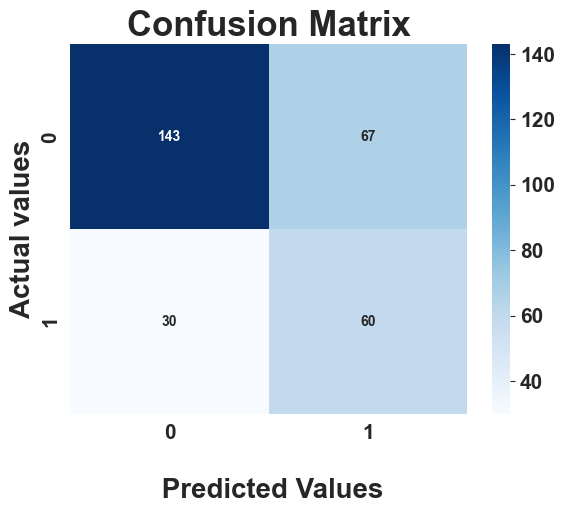

In [57]:
model_metrics(LR,x_trainr,y_trainr,y_test,y_pred,y_pred_train)

In [58]:
 #selecting parameter for hyperparameter tuning

parameter ={'penalty':['l1','l2','elasticnet'],
             'C':[1,2,3,4,5],
             'max_iter':[100,150,200]}



## **GriSearchCV on Logistic Regression** 

GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters. Note that there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.

In [59]:
#hyperparameter tuning on Logistic regression
LR = LogisticRegression()
LR_Grid = GridSearchCV(LR,param_grid=parameter,cv=20,verbose=1)
LR_Grid.fit(x_trainr,y_trainr)


Fitting 20 folds for each of 45 candidates, totalling 900 fits


GridSearchCV(cv=20, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5], 'max_iter': [100, 150, 200],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=1)

In [60]:
# let's check best parameter for model
LR_Grid.best_params_

{'C': 2, 'max_iter': 100, 'penalty': 'l2'}

In [61]:
y_pred_LR_Grid = LR_Grid.predict(X_test)
y_pred_train_LR_Grid = LR_Grid.predict(x_trainr)

Train Score :0.7387755102040816
Test score :0.68
precision_score: 0.4765625
recall_score: 0.6777777777777778
Classification report for Training
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       490
           1       0.73      0.77      0.75       490

    accuracy                           0.74       980
   macro avg       0.74      0.74      0.74       980
weighted avg       0.74      0.74      0.74       980

Classification report for Testing
              precision    recall  f1-score   support

           0       0.83      0.68      0.75       210
           1       0.48      0.68      0.56        90

    accuracy                           0.68       300
   macro avg       0.65      0.68      0.65       300
weighted avg       0.72      0.68      0.69       300




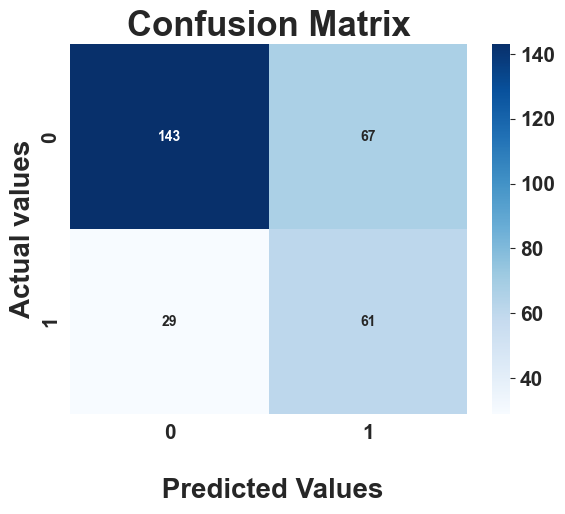

In [62]:
model_metrics(LR_Grid,x_trainr,y_trainr,y_test,y_pred_LR_Grid,y_pred_train_LR_Grid)

In [63]:
#prediciton probablity
y_pred_proba = LR_Grid.predict_proba(X_test)[::,1]

In [64]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [65]:
#area under curve
auc_score=roc_auc_score(y_test,y_pred_proba)
auc_score

np.float64(0.7273544973544974)

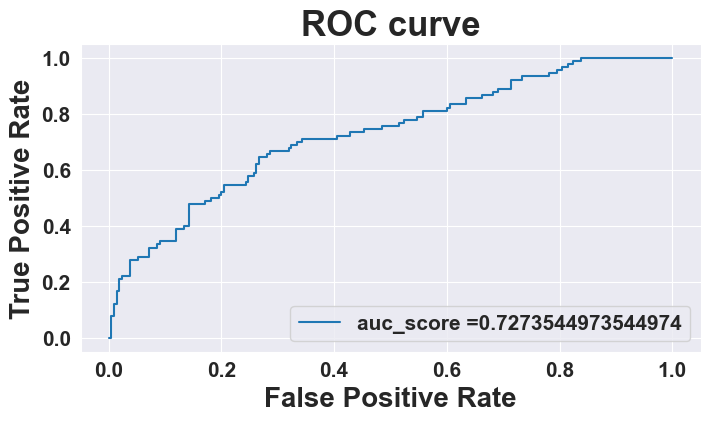

In [66]:
#roc curve plot
plot_roc_curve(fpr,tpr,auc_score)

## **Decision Tree**

In [67]:
#decision tree model
dt= DecisionTreeClassifier()
#fitting data
dt.fit(x_trainr,y_trainr)


DecisionTreeClassifier()

In [68]:
#prediction
y_pred_dt = dt.predict(X_test)
y_pred_dt_train = dt.predict(x_trainr)

Train Score :1.0
Test score :0.61
precision_score: 0.36893203883495146
recall_score: 0.4222222222222222
Classification report for Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       490
           1       1.00      1.00      1.00       490

    accuracy                           1.00       980
   macro avg       1.00      1.00      1.00       980
weighted avg       1.00      1.00      1.00       980

Classification report for Testing
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       210
           1       0.37      0.42      0.39        90

    accuracy                           0.61       300
   macro avg       0.55      0.56      0.55       300
weighted avg       0.63      0.61      0.62       300




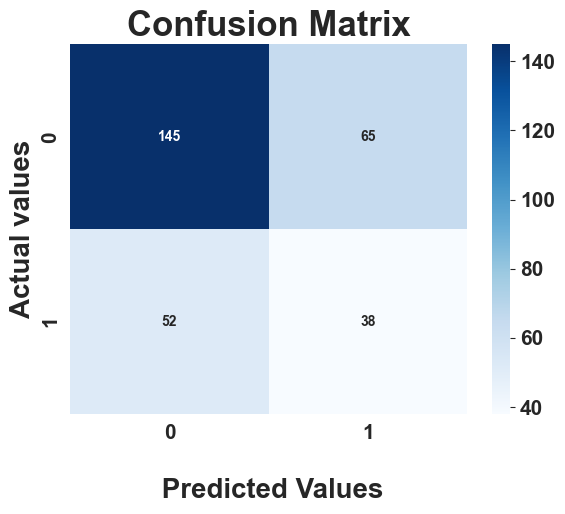

In [69]:
#model metrics
model_metrics(dt,x_trainr,y_trainr,y_test,y_pred_dt,y_pred_dt_train)

## **GridSearchCV on Decision Tree**

In [70]:
#selecting parameter for hyperparameter tuning
parameter = {"max_depth": [1,2,3,4,5],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9,10],
              "criterion": [ "gini","entropy"],
             "class_weight":["balanced"],
            "ccp_alpha":[0.01,0.1]}

In [71]:
tree = DecisionTreeClassifier()

In [72]:
tree_Grid = GridSearchCV(tree, param_grid=parameter,cv=5,n_jobs=-1,verbose=3)
#fitting data

tree_Grid.fit(x_trainr,y_trainr)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.01, 0.1], 'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=3)

In [73]:
#best parameter for model
tree_Grid.best_params_

{'ccp_alpha': 0.01,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 6}

In [74]:
#prediction
y_pred_tree = tree_Grid.predict(X_test)
y_pred_tree_train = tree_Grid.predict(x_trainr)

In [75]:
#prediciton probablity
y_pred_proba = tree_Grid.predict_proba(X_test)[::,1]

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [77]:
#area under curve
auc_score=roc_auc_score(y_test,y_pred_proba)
auc_score

np.float64(0.5795238095238096)

Train Score :0.6602040816326531
Test score :0.4866666666666667
precision_score: 0.3446601941747573
recall_score: 0.7888888888888889
Classification report for Training
              precision    recall  f1-score   support

           0       0.80      0.43      0.56       490
           1       0.61      0.89      0.72       490

    accuracy                           0.66       980
   macro avg       0.70      0.66      0.64       980
weighted avg       0.70      0.66      0.64       980

Classification report for Testing
              precision    recall  f1-score   support

           0       0.80      0.36      0.49       210
           1       0.34      0.79      0.48        90

    accuracy                           0.49       300
   macro avg       0.57      0.57      0.49       300
weighted avg       0.66      0.49      0.49       300




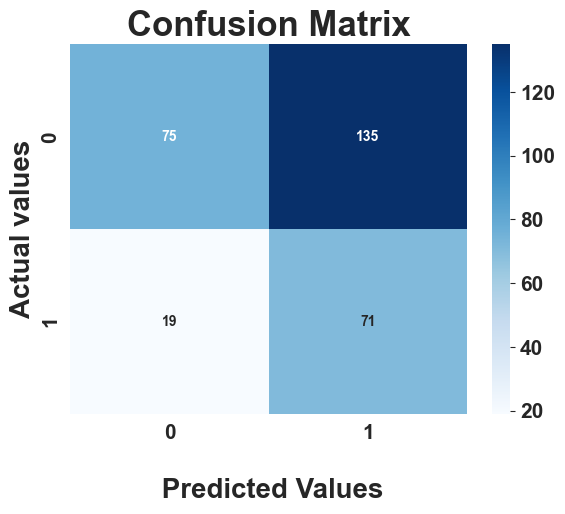

In [78]:
#model metrics
model_metrics(tree_Grid,x_trainr,y_trainr,y_test,y_pred_tree,y_pred_tree_train)

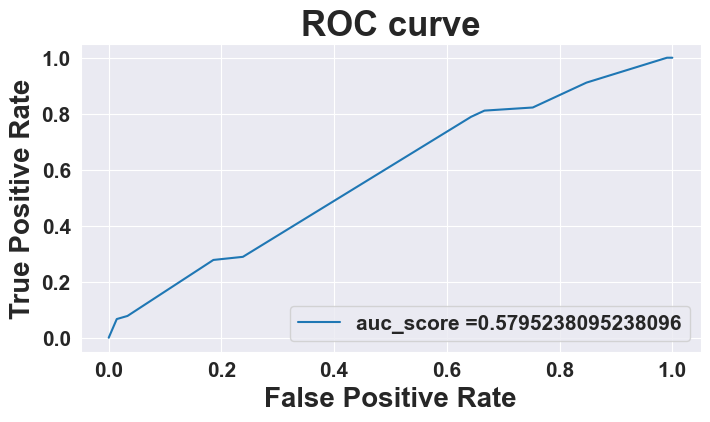

In [79]:
#plot roc curve and auc score
plot_roc_curve(fpr,tpr,auc_score)

## **Random Forest Classifier**

In [80]:
#fitting data
rf = RandomForestClassifier()

rf.fit(x_trainr,y_trainr)


RandomForestClassifier()

In [81]:
#prediction
y_pred_rf = rf.predict(X_test)
y_pred_rf_train = rf.predict(x_trainr)

Train Score :1.0
Test score :0.6966666666666667
precision_score: 0.49206349206349204
recall_score: 0.34444444444444444
Classification report for Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       490
           1       1.00      1.00      1.00       490

    accuracy                           1.00       980
   macro avg       1.00      1.00      1.00       980
weighted avg       1.00      1.00      1.00       980

Classification report for Testing
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       210
           1       0.49      0.34      0.41        90

    accuracy                           0.70       300
   macro avg       0.62      0.60      0.60       300
weighted avg       0.67      0.70      0.68       300




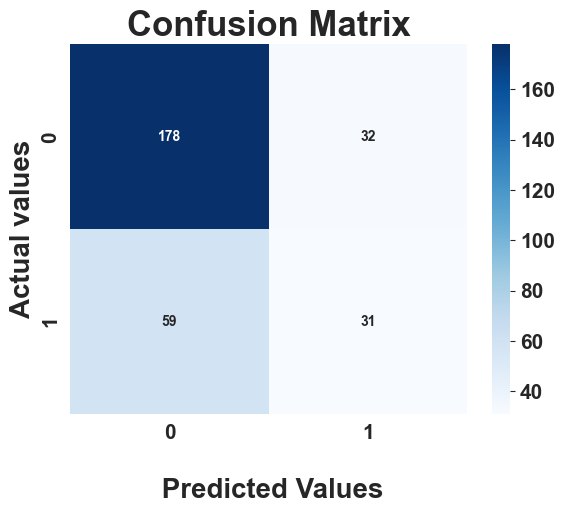

In [82]:
#model metrics
model_metrics(rf,x_trainr,y_trainr,y_test,y_pred_rf,y_pred_rf_train)

## **GridSearchCV on Random Forest**

In [83]:
#selecting paramter for hyperparamter tuning
parameter = {'n_estimators':[20,60,100,120],
             'criterion':['gini','entropy'], 
             'max_depth':[2,6,8,None],
             'class_weight':['balanced','balanced_subsample'],
             'max_samples':[0.5,0.75,1.0]}

In [84]:
rf=RandomForestClassifier()
rf_Grid = GridSearchCV(rf,param_grid=parameter,cv=5,verbose=1,n_jobs=-1)

In [85]:
#fitting data

rf_Grid.fit(x_trainr,y_trainr)


Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 6, 8, None],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=1)

In [86]:
#checking best parameter of model
rf_Grid.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': None,
 'max_samples': 1.0,
 'n_estimators': 120}

In [87]:
#prediction
y_pred_rf_grid = rf_Grid.predict(X_test)
y_pred_rf_train_grid = rf_Grid.predict(x_trainr)

In [88]:
#prediciton probablity
y_pred_proba = rf_Grid.predict_proba(X_test)[::,1]

In [89]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [90]:
#area under curve
auc_score=roc_auc_score(y_test,y_pred_proba)
auc_score

np.float64(0.6875396825396825)

Train Score :1.0
Test score :0.7066666666666667
precision_score: 0.5166666666666667
recall_score: 0.34444444444444444
Classification report for Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       490
           1       1.00      1.00      1.00       490

    accuracy                           1.00       980
   macro avg       1.00      1.00      1.00       980
weighted avg       1.00      1.00      1.00       980

Classification report for Testing
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       210
           1       0.52      0.34      0.41        90

    accuracy                           0.71       300
   macro avg       0.64      0.60      0.61       300
weighted avg       0.68      0.71      0.69       300




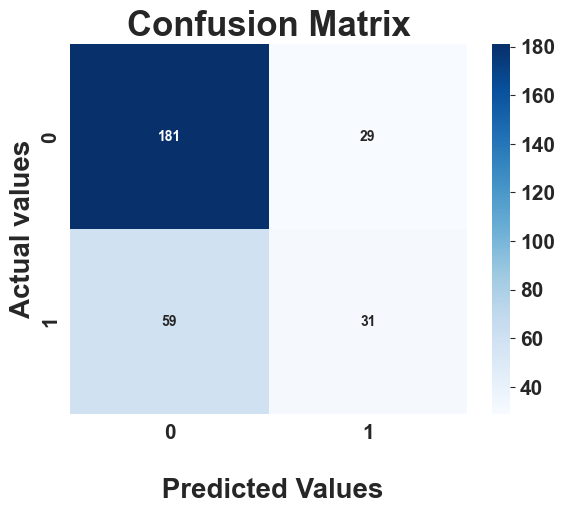

In [91]:
#model metrics
model_metrics(rf_Grid,x_trainr,y_trainr,y_test,y_pred_rf_grid,y_pred_rf_train_grid)

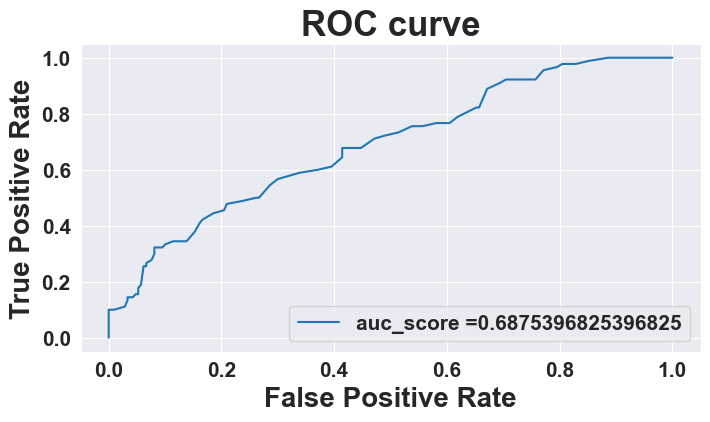

In [92]:
#plot roc curve and auc score
plot_roc_curve(fpr,tpr,auc_score)

In [93]:
import pickle #library for saving the model for future use or model deployment


In [94]:
pickle.dump(LR_Grid,open('logistic_model.pkl','wb'))

## **Conclusion**

* Summary 
The following topics were covered in this tutorial:

* Preparing a dataset for training
* In feature engineering we created bins of feature in some category to reduce number of dimensions, converted categorical variablles into numerical variable,
applied scaling technique to scale data on a same scale.
* Handled imbalance class using Random over sampling technique
* Training and interpreting Logistic regression
* Training and interpreting decision trees
* Training and interpreting random forests
* hyperparameter tuning using GridSearchCV and evaluated model using confusion matrix and classification report


* Logistic regression model has performed overall better than others, achieved recall of 0.6777

